In [2]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [3]:
base = 'https://api.coingecko.com/api/v3/'

In [4]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [5]:
result = requests.get(url)
j_bc = result.json()

In [6]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1577016276569,7167.743506
1,1577019870340,7170.256951
2,1577023469225,7169.511733
3,1577026840948,7171.993227
4,1577030865300,7187.891321
5,1577034290482,7227.293974
6,1577037880564,7300.630717
7,1577041467252,7390.604203
8,1577045057411,7410.593050
9,1577048557532,7405.145847


In [7]:
url = base + 'coins/dogecoin/market_chart'


In [8]:
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}


In [9]:
result = requests.get(url, params=param_dict)


In [10]:
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1577016313519,0.002085
1,1577019939606,0.002086
2,1577023650207,0.002084
3,1577027263760,0.002082
4,1577030844698,0.002080
5,1577034466834,0.002088
6,1577038066175,0.002103
7,1577041752456,0.002111
8,1577045260676,0.002112
9,1577048872716,0.002110


In [11]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [12]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2019-12-22 12:04:36.569,7167.743506
2019-12-22 13:04:30.340,7170.256951
2019-12-22 14:04:29.225,7169.511733
2019-12-22 15:00:40.948,7171.993227
2019-12-22 16:07:45.300,7187.891321
2019-12-22 17:04:50.482,7227.293974
2019-12-22 18:04:40.564,7300.630717
2019-12-22 19:04:27.252,7390.604203
2019-12-22 20:04:17.411,7410.593050


In [13]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2019-12-22 12:05:13.519,0.002085
2019-12-22 13:05:39.606,0.002086
2019-12-22 14:07:30.207,0.002084
2019-12-22 15:07:43.760,0.002082
2019-12-22 16:07:24.698,0.002080
2019-12-22 17:07:46.834,0.002088
2019-12-22 18:07:46.175,0.002103
2019-12-22 19:09:12.456,0.002111
2019-12-22 20:07:40.676,0.002112


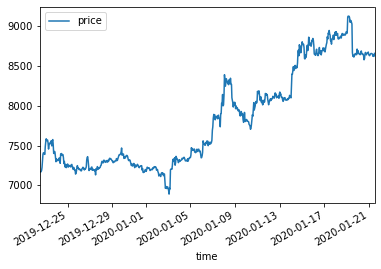

In [14]:
df_bc.plot()

![logo](Dogecoin_logo.png)

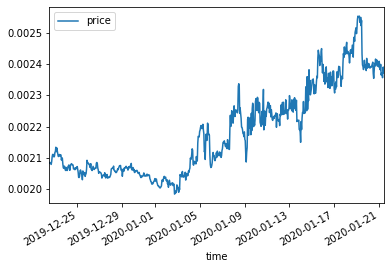

In [15]:
df_dc.plot()

# top ten coins report

In [16]:
url = base + 'coins/list'

In [17]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,02-token,o2t,O2 Token
2,0chain,zcn,0chain
3,0x,zrx,0x
4,0xcert,zxc,0xcert
5,0xdark,oxd,0xDark
6,10m-token,10mt,10M Token
7,10x-long-algorand-token,algomoon,10X Long Algorand Token
8,10x-long-altcoin-index-token,altmoon,10X Long Altcoin Index Token
9,10x-long-bitcoin-cash-token,bchmoon,10X Long Bitcoin Cash Token


In [29]:
data_df = df_list.iloc[:10, 0]
data_df

0                          01coin
1                        02-token
2                          0chain
3                              0x
4                          0xcert
5                          0xdark
6                       10m-token
7         10x-long-algorand-token
8    10x-long-altcoin-index-token
9     10x-long-bitcoin-cash-token
Name: id, dtype: object

In [30]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_report = pd.concat(data_list)
data_report

,date_time,price,file_name
0,1553731200000,0.003594,01coin
1,1553817600000,0.003465,01coin
2,1553904000000,0.003532,01coin
3,1553990400000,0.003870,01coin
4,1554076800000,0.003883,01coin
...,...,...,...
49,1579305600000,0.000029,10x-long-bitcoin-cash-token
50,1579392000000,0.000012,10x-long-bitcoin-cash-token
51,1579478400000,0.000008,10x-long-bitcoin-cash-token
52,1579564800000,0.000007,10x-long-bitcoin-cash-token


In [31]:
data_report = data_report.set_index('date_time')

data_report.head()

,price,file_name
date_time,,
1553731200000,0.003594,01coin
1553817600000,0.003465,01coin
1553904000000,0.003532,01coin
1553990400000,0.003870,01coin
1554076800000,0.003883,01coin


In [32]:
data_report.to_csv('top_ten_report.csv')

In [33]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1553731200000,0.003594,01coin
1,1553817600000,0.003465,01coin
2,1553904000000,0.003532,01coin
3,1553990400000,0.003870,01coin
4,1554076800000,0.003883,01coin
...,...,...,...
1861,1579305600000,0.000029,10x-long-bitcoin-cash-token
1862,1579392000000,0.000012,10x-long-bitcoin-cash-token
1863,1579478400000,0.000008,10x-long-bitcoin-cash-token
1864,1579564800000,0.000007,10x-long-bitcoin-cash-token
